Скачайте файл n_log2.txt и изучите структуру и содержимое строк (пакетов) в нем. 

Реализовать на своем компьютере. Используя регулярные выражения, сделать шаблон для получения измеренного объема volume (значение из подстроки, например, “volume=366”) из файла n_log2.txt, которые измерило устройство с  номером A00000000002. Значения volume нужно получить из пакетов, содержащих подстроки «A00000000002 <--->» и «KEEP». На одном рисунке разместить два графика: 

1-й) За первый 10 минутный интервал времени. Ось абсцисс – время (указано в начале пакета), ось ординат – значение volume, измеренное устройством с  номером A00000000002. На графике точками отмечаем измеренные значения volume, точки эти соединяем линией.

2-й) Час делим на отрезки по 10 мин. На каждом отрезке времени находим среднее значение volume, измеренное устройством с номером A00000000002. Ось абсцисс – порядковый номер временного отрезка, ось ординат – значение volume. На графике точками отмечаем средние измеренные значения volume, точки эти соединяем линией. 

На каждом графике полученные точки соединить линиями, подписать оси координат, названия графиков, легенду (названия линий).



Вставьте в ответ строчку кода, в которой с помощью print() передать номер варианта, на котором отображены верные графики. (Например, print(1)).

In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Шаг 1: Загрузка данных
filename = "n_log2.txt"
with open(filename, "r") as file:
    lines = file.readlines()

# Шаг 2: Извлечение данных с помощью регулярных выражений 
# 15:00:00,499 [acp] C A00000000002 <---> 0 U/192.168.11.105:1234 {a2} KEEP pressure=992021,var_clip=[0=100],gard=7.2,battery=3.83,capacity_type=6,_cycle=1000,ver=1.0,volume=293,finding={capacity_arr=[1.09,11.95,6.91,8.54],capacitive_devices=[B00000000001,B00000000005,B00000000002,B00000000003],link_power_arr=[54,77,73,69]}
pattern = re.compile(r"(\d{2}:\d{2}:\d{2},\d{3}).*A00000000002 <--->.*KEEP.*volume=(\d+)")

# Каждый элемент списка: (временная метка, значение volume)
data = []

for line in lines:
    # Ищем совпадение строки с шаблоном регулярного выражения
    match = pattern.search(line)
    if match:
        
        time_str = match.group(1)
        volume = int(match.group(2))
        
        # Преобразуем строку временной метки в объект datetime
        timestamp = datetime.strptime(time_str, "%H:%M:%S,%f")
        data.append((timestamp, volume))



In [2]:
data

[(datetime.datetime(1900, 1, 1, 15, 0, 0, 499000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 1, 505000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 2, 504000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 3, 498000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 4, 498000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 5, 498000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 6, 500000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 7, 498000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 8, 500000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 9, 500000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 10, 498000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 11, 500000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 12, 497000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 13, 500000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 14, 497000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 16, 497000), 293),
 (datetime.datetime(1900, 1, 1, 15, 0, 17, 508000), 293),
 (datetime.datetime(1900

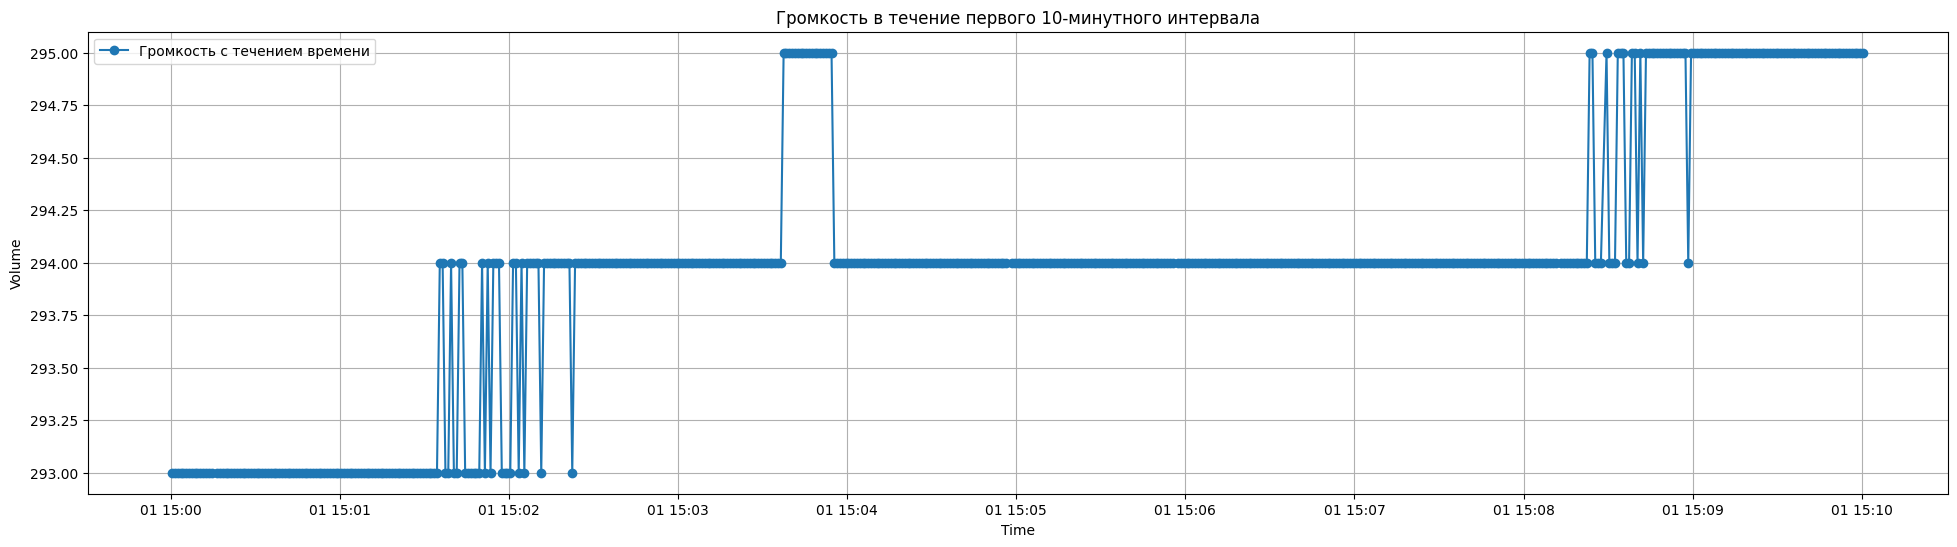

In [3]:
# Шаг 3: Построение первого графика (значения за первый 10-минутный интервал)
data.sort()
start_time = data[0][0]

# Добавляем 10 минут к стартовому времени
end_time = start_time + timedelta(minutes=10)

# Включаем только записи, где временная метка находится в заданных пределах
first_interval_data = [(t, v) for t, v in data if start_time <= t < end_time]

# Разделяем данные интервала на отдельные списки
times_1 = [t for t, v in first_interval_data]
volumes_1 = [v for t, v in first_interval_data]

# Создаем график
plt.figure(figsize=(24, 6)) # размер графика
plt.plot(times_1, volumes_1, marker="o", label="Громкость с течением времени") # ось абсцисс
plt.xlabel("Time")
plt.ylabel("Volume")
plt.title("Громкость в течение первого 10-минутного интервала")
plt.legend()
plt.grid(True)
plt.show()

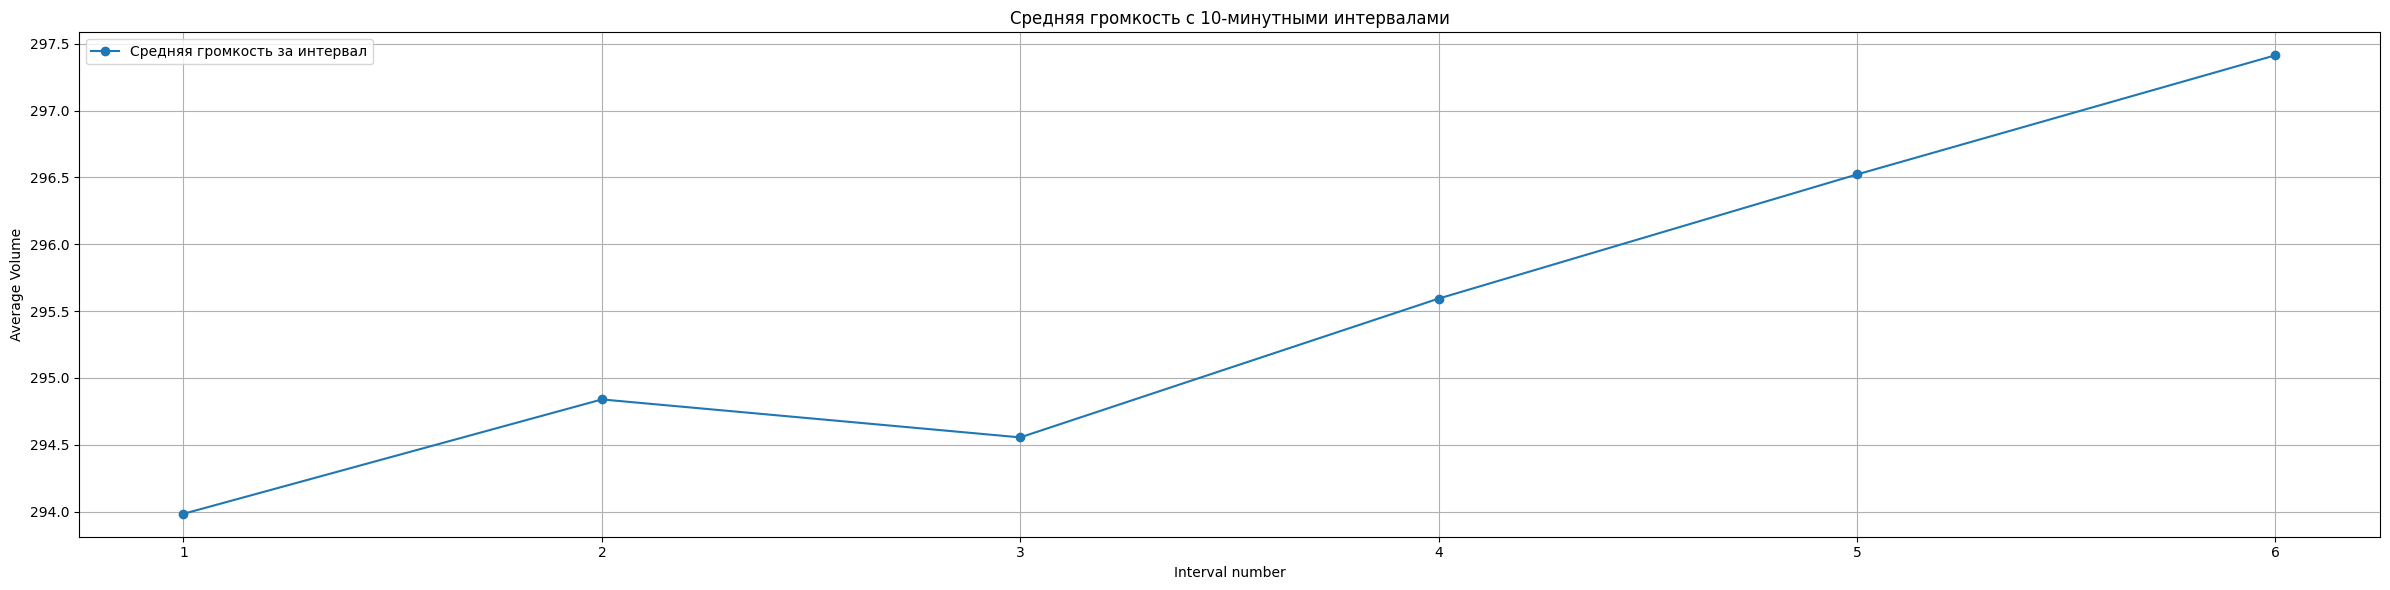

In [4]:
# Шаг 4: Построение второго графика (средние значения за каждый 10-минутный интервал)

# Генерируем список кортежей (начало интервала, конец интервала) - 10-минутных интервалов для анализа
hour_intervals = [(start_time + timedelta(minutes=10 * i), start_time + timedelta(minutes=10 * (i + 1))) for i in range(6)]

# значений volume за каждый интервал
means = []

for start, end in hour_intervals:
    # значения volume, относящиеся к текущему интервалу
    interval_volumes = [v for t, v in data if start <= t < end]
    # данные в текущем интервале
    if interval_volumes:
        means.append(sum(interval_volumes) / len(interval_volumes))
    else:
        means.append(0)

# Номера интервалов для оси X
interval_numbers = list(range(1, len(hour_intervals) + 1))

plt.figure(figsize=(24, 6))
plt.plot(interval_numbers, means, marker="o", label="Средняя громкость за интервал") # ось абсцисс
plt.xlabel("Interval number")
plt.ylabel("Average Volume")
plt.title("Средняя громкость с 10-минутными интервалами")
plt.xticks(interval_numbers)
plt.legend()
plt.grid(True)

# Шаг 5: Отображение графиков
plt.tight_layout() #автоматическое выравнивание элементов графиков
plt.show()

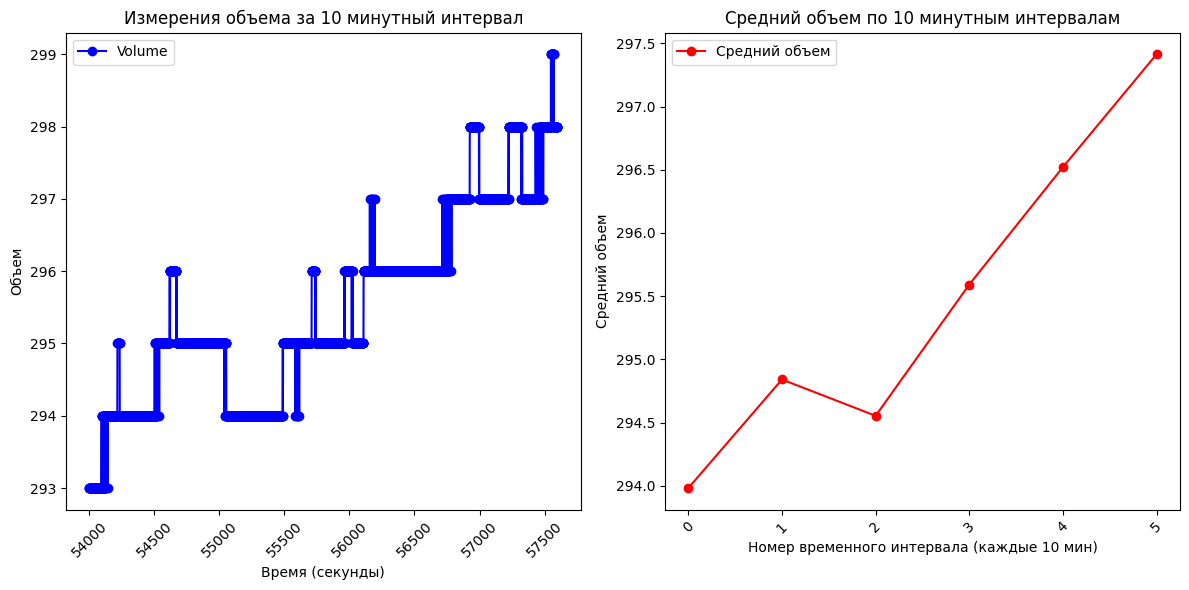

In [5]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Чтение файла и извлечение данных
def extract_volume_data(filename):
    with open(filename, 'r') as file:
        data = file.readlines()

    volume_values = []
    timestamps = []

    for line in data:
        # Ищем строки с нужными подстроками
        if 'A00000000002 <--->' in line and 'KEEP' in line:
            # Ищем время
            time_match = re.match(r'(\d{2}:\d{2}:\d{2})', line)
            if time_match:
                timestamps.append(time_match.group(1))

            # Ищем volume
            volume_match = re.search(r'volume=(\d+)', line)
            if volume_match:
                volume_values.append(int(volume_match.group(1)))

    return timestamps, volume_values

# Шаг 2: Построение графиков
def plot_data(timestamps, volume_values):
    # Преобразуем время в секунды
    times = [int(t.split(':')[0]) * 3600 + int(t.split(':')[1]) * 60 + int(t.split(':')[2]) for t in timestamps]

    # График 1: все значения volume за первые 10 минут
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(times, volume_values, marker='o', linestyle='-', color='b', label='Volume')
    plt.xlabel('Время (секунды)')
    plt.ylabel('Объем')
    plt.title('Измерения объема за 10 минутный интервал')
    plt.xticks(rotation=45)
    plt.legend()

    # График 2: средние значения volume по 10 минутам
    avg_volume = []
    time_intervals = []

    # Делим на 10 минут (600 секунд)
    segment_duration = 600
    current_segment_sum = 0
    current_segment_count = 0
    current_segment_start = times[0]

    for t, vol in zip(times, volume_values):
        if t < current_segment_start + segment_duration:
            current_segment_sum += vol
            current_segment_count += 1
        else:
            # Сохраняем среднее значение для текущего сегмента
            if current_segment_count > 0:
                avg_volume.append(current_segment_sum / current_segment_count)
                time_intervals.append(current_segment_start)
            # Переход к следующему сегменту
            current_segment_start += segment_duration
            current_segment_sum = vol
            current_segment_count = 1

    # Добавляем последний сегмент, если есть данные
    if current_segment_count > 0:
        avg_volume.append(current_segment_sum / current_segment_count)
        time_intervals.append(current_segment_start)

    plt.subplot(1, 2, 2)
    plt.plot(range(len(avg_volume)), avg_volume, marker='o', linestyle='-', color='r', label='Средний объем')
    plt.xlabel('Номер временного интервала (каждые 10 мин)')
    plt.ylabel('Средний объем')
    plt.title('Средний объем по 10 минутным интервалам')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Основная функция
def main():
    filename = 'n_log2.txt'  # Укажите путь к файлу n_log2.txt
    timestamps, volume_values = extract_volume_data(filename)
    plot_data(timestamps, volume_values)

# Запуск программы
if __name__ == "__main__":
    main()
